# Spam Detection

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
ds = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Analysis

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
ds.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
ds = ds.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [8]:
ds

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
ds = ds.rename(columns={'v1':'type', 'v2':'text'})

In [10]:
ds['type']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: object

In [11]:
ds['type'].map({'ham':0,'spam':1})

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5572, dtype: int64

In [12]:
ds['type'] = ds['type'].map({'ham':0,'spam':1})

In [13]:
ds

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
ds.duplicated().sum()

403

In [15]:
ds = ds.drop_duplicates(keep='first')

In [16]:
ds['text'].duplicated().sum()

0

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [18]:
ds.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
ds['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

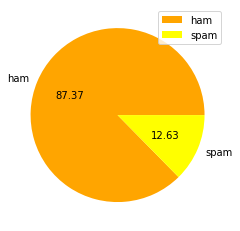

In [20]:
plt.pie(ds['type'].value_counts(), labels=['ham','spam'], colors=['orange','yellow'], autopct="%0.2f")
plt.legend();

## Feature Extraction

In [21]:
ds['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [22]:
ds['num_characters'] = ds['text'].apply(len)

In [23]:
ds.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
ds['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [25]:
ds["num_words"] = ds['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
ds.head()

,type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
ds['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [28]:
ds["num_sentences"] = ds['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
ds.head()

,type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
ds[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# for spam
ds[ds['type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
# for non spam (ham)
ds[ds['type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


## Visualization

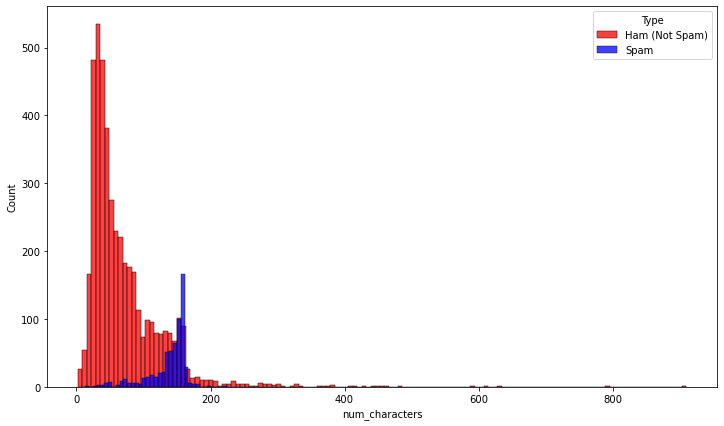

In [33]:
plt.figure(figsize=(12,7))
sns.histplot(ds[ds['type'] == 0]['num_characters'],color='red')
sns.histplot(ds[ds['type'] == 1]['num_characters'],color='blue')
plt.legend(labels=["Ham (Not Spam)","Spam"], title="Type")

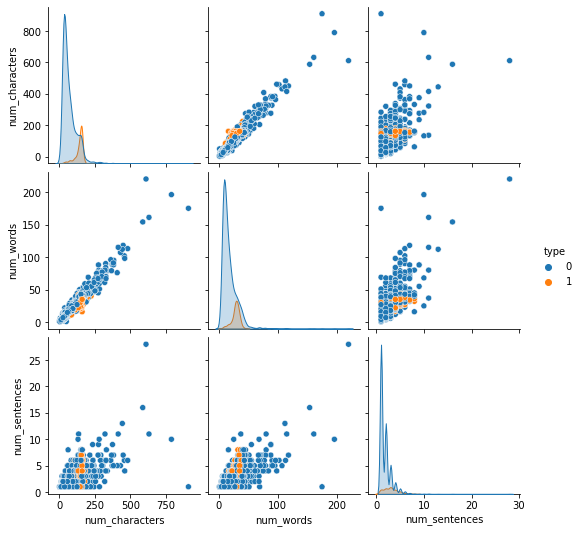

In [34]:
# 0 --> Ham (Not Spam)
# 1 --> Spam
sns.pairplot(ds, hue='type')

In [35]:
ds.corr()

,type,num_characters,num_words,num_sentences
type,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

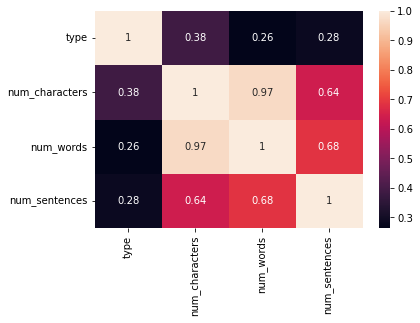

In [36]:
sns.heatmap(ds.corr(), annot=True)

## Data Preprocessing

In [37]:
ds['text'][1]

'Ok lar... Joking wif u oni...'

In [38]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()
wnl = WordNetLemmatizer()

class transformation():
    def __init__(self):
        self.text = ""
        
    def text_transformation(self, text):
        y = []
        text = text.split()           # Tokenization

        for i in text:
            y.append(ps.stem(i))          # Stemming

        text = y[:]
        y.clear()

        for i in text:
            y.append(wnl.lemmatize(i))           # Lemmitization

        text = y[:]
        y.clear()

        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)           # StopWord and Punctation Removal

        return " ".join(y)

In [39]:
tf = transformation()

In [40]:
tf.text_transformation(ds['text'][1])

'ok lar... joke wif u oni...'

In [41]:
ds['transformed_text'] = ds['text'].apply(tf.text_transformation)

In [42]:
ds.head()

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail onli bugi n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"


## Encoding of Independent & Dependent Data

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X = vector.fit_transform(ds['transformed_text'])
y = ds['type']

In [44]:
print(X)

  (0, 7801)	0.1860442521504474
  (0, 1059)	0.3365316002063434
  (0, 3435)	0.15759745708021097
  (0, 1986)	0.28386065787785913
  (0, 1703)	0.3211263371364384
  (0, 4266)	0.28386065787785913
  (0, 8007)	0.23492985295696706
  (0, 3475)	0.1878979882654017
  (0, 1705)	0.2947908659721963
  (0, 5256)	0.16887150511079863
  (0, 1286)	0.2654142478784645
  (0, 2246)	0.3017180009822357
  (0, 5624)	0.2530501317380492
  (0, 4150)	0.3365316002063434
  (0, 3390)	0.1354174927198747
  (1, 5254)	0.5559577528789098
  (1, 7917)	0.435347940020484
  (1, 4115)	0.5007583458291837
  (1, 4303)	0.4139683615848099
  (1, 5223)	0.2815216205248931
  (2, 77)	0.23769395096970508
  (2, 1154)	0.18547469329512378
  (2, 5917)	0.16329045141317866
  (2, 7484)	0.12274223516013014
  (2, 6823)	0.20049220119144187
  :	:
  (5165, 8178)	0.3744943755549847
  (5165, 3717)	0.3389520578595408
  (5165, 3390)	0.26879885452114627
  (5166, 6952)	0.4966750911529332
  (5166, 5558)	0.4966750911529332
  (5166, 4862)	0.43507141718049236
  (516

In [45]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5169, dtype: int64


## Splitting the dataset into the Training set and Test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [47]:
len(y_test)

1034

## Logistic Regression

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predLR = lr.predict(X_test)

acc_lrTrain = lr.score(X_train, y_train) * 100
acc_lrTest = accuracy_score(y_predLR, y_test) * 100
print("Training Accuracy: ", acc_lrTrain)
print("Validation Accuracy: ", acc_lrTest)

Training Accuracy:  96.71100362756953
Validation Accuracy:  94.39071566731141


In [50]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       913
           1       1.00      0.52      0.68       121

    accuracy                           0.94      1034
   macro avg       0.97      0.76      0.83      1034
weighted avg       0.95      0.94      0.94      1034



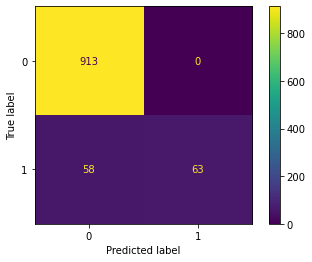

In [51]:
conf_matrix_LR = plot_confusion_matrix(lr, X_test, y_test)

## Linear Support Vector Classification (SVC)

In [52]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_predLSVC = lsvc.predict(X_test)

acc_lsvcTrain = lr.score(X_train, y_train) * 100
acc_lsvcTest = accuracy_score(y_predLSVC, y_test) * 100
print("Training Accuracy: ", acc_lsvcTrain)
print("Validation Accuracy: ", acc_lsvcTest)

Training Accuracy:  96.71100362756953
Validation Accuracy:  97.09864603481626


In [53]:
print(classification_report(y_test,y_predLSVC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       913
           1       0.97      0.78      0.86       121

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.97      1034



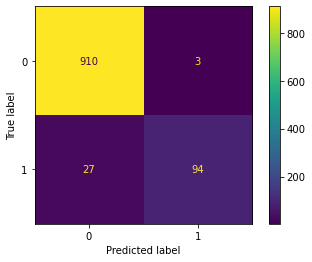

In [54]:
conf_matrix_LSVC = plot_confusion_matrix(lsvc, X_test, y_test)

## Bernoulli Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_predBNB = bnb.predict(X_test)

acc_bnbTrain = lr.score(X_train, y_train) * 100
acc_bnbTest = accuracy_score(y_predBNB, y_test) * 100
print("Training Accuracy: ", acc_bnbTrain)
print("Validation Accuracy: ", acc_bnbTest)

Training Accuracy:  96.71100362756953
Validation Accuracy:  96.0348162475822


In [56]:
print(classification_report(y_test,y_predBNB))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       913
           1       0.93      0.72      0.81       121

    accuracy                           0.96      1034
   macro avg       0.94      0.86      0.89      1034
weighted avg       0.96      0.96      0.96      1034



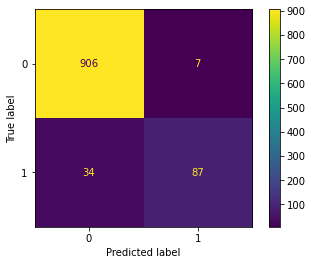

In [57]:
conf_matrix_BNB = plot_confusion_matrix(bnb, X_test, y_test)

## Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtc.fit(X_train,y_train)
y_predDTC = dtc.predict(X_test)

acc_dtcTrain = lr.score(X_train, y_train) * 100
acc_dtcTest = accuracy_score(y_predDTC, y_test) * 100
print("Training Accuracy: ", acc_dtcTrain)
print("Validation Accuracy: ", acc_dtcTest)

Training Accuracy:  96.71100362756953
Validation Accuracy:  95.26112185686654


In [59]:
print(classification_report(y_test,y_predDTC))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       913
           1       0.83      0.74      0.79       121

    accuracy                           0.95      1034
   macro avg       0.90      0.86      0.88      1034
weighted avg       0.95      0.95      0.95      1034



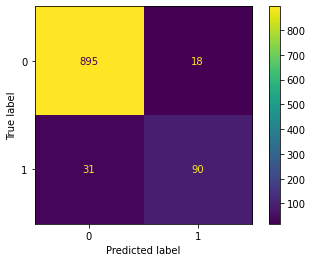

In [60]:
conf_matrix_DTC = plot_confusion_matrix(dtc, X_test, y_test)

## K Neighbor Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predKNN = knn.predict(X_test)

acc_knnTrain = lr.score(X_train,y_train) * 100
acc_knnTest = accuracy_score(y_predKNN, y_test) * 100
print("Training Accuracy: ", acc_knnTrain)
print("Validation Accuracy: ", acc_knnTest)

Training Accuracy:  96.71100362756953
Validation Accuracy:  90.32882011605416


In [62]:
print(classification_report(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       913
           1       1.00      0.17      0.30       121

    accuracy                           0.90      1034
   macro avg       0.95      0.59      0.62      1034
weighted avg       0.91      0.90      0.87      1034



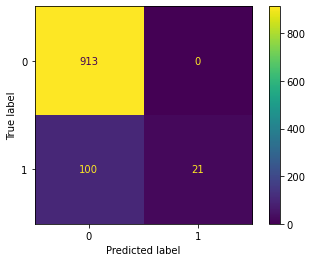

In [63]:
conf_matrix_KNN = plot_confusion_matrix(knn, X_test, y_test)

## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=2)
rfc.fit(X_train,y_train)
y_predRFC = rfc.predict(X_test)

acc_rfcTrain = lr.score(X_train, y_train) * 100
acc_rfcTest = accuracy_score(y_predRFC, y_test) * 100
print("Training Accuracy: ", acc_rfcTrain)
print("Validation Accuracy: ", acc_rfcTest)

Training Accuracy:  96.71100362756953
Validation Accuracy:  97.00193423597679


In [65]:
print(classification_report(y_test,y_predRFC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       913
           1       0.99      0.75      0.85       121

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



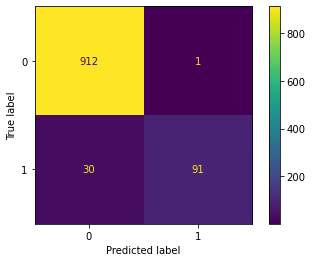

In [66]:
conf_matrix_RFC = plot_confusion_matrix(rfc, X_test, y_test)

## Performance Analysis

In [67]:
performance_df = pd.DataFrame({'Algorithm':['Logistic Regression','Linear SVC', 'Bernoulli NB', 'Decision Tree', 'KNeighbors Classifier', 'Random Forest Classifier'],'Training Accuracy':[acc_lrTrain, acc_lsvcTrain, acc_bnbTrain, acc_dtcTrain, acc_knnTrain, acc_rfcTrain], 'Testing Accuracy':[acc_lrTest, acc_lsvcTest, acc_bnbTest, acc_dtcTest, acc_knnTest, acc_rfcTest]}).set_index('Algorithm')

In [68]:
performance_df.sort_values('Testing Accuracy',ascending=False)

,Training Accuracy,Testing Accuracy
Algorithm,,
Linear SVC,96.711004,97.098646
Random Forest Classifier,96.711004,97.001934
Bernoulli NB,96.711004,96.034816
Decision Tree,96.711004,95.261122
Logistic Regression,96.711004,94.390716
KNeighbors Classifier,96.711004,90.328820


## Exporting Model

In [69]:
ds[ds['type'] == 0]

,type,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. avail onli bugi n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joke wif u oni...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor... u c alreadi say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goe usf, live around though"
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak me. treat like aid pat...
...,...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1,huh lei...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanad fr home?
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"pity, wa mood that. so...ani suggestions?"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like i'd interest buy someth el ...


In [70]:
ds.transformed_text[4]

'nah think goe usf, live around though'

In [71]:
lsvc.predict(vector.transform([ds.transformed_text[4]]))

array([0], dtype=int64)

In [72]:
rfc.predict(vector.transform([ds.transformed_text[4]]))

array([0], dtype=int64)

In [73]:
ds[ds['type'] == 1]

,type,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl it' 3 week' word back! i'd li...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner!! valu network custom select receivea å...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month more? u r entitl updat latest c...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,"six chanc win cash! 100 20,000 pound txt> csh1..."
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 secs? ring 02073162414 no...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free mins. india...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,"contract mobil 11 mnths? latest motorola, noki..."
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2: get 2.50 pound free call credit det...


In [74]:
ds.transformed_text[11]

'six chanc win cash! 100 20,000 pound txt> csh11 send 87575. cost 150p/day, 6days, 16+ tsandc appli repli hl 4 info'

In [75]:
lsvc.predict(vector.transform([ds.transformed_text[11]]))

array([1], dtype=int64)

In [76]:
rfc.predict(vector.transform([ds.transformed_text[11]]))

array([1], dtype=int64)

In [79]:
spamDetection_model_LSVC = LinearSVC()
spamDetection_model_LSVC.fit(X,y)

y_finalLSVC = spamDetection_model_LSVC.predict(X)
accFinal1 = round(accuracy_score(y_finalLSVC, y), 2) * 100
print("Final Accuracy: ", accFinal1)

Final Accuracy:  100.0


In [80]:
spamDetection_model_RFC = RandomForestClassifier(n_estimators=500, random_state=2)
spamDetection_model_RFC.fit(X,y)

y_finalRFC = spamDetection_model_RFC.predict(X)
accFinal2 = round(accuracy_score(y_finalRFC, y), 2) * 100
print("Final Accuracy: ", accFinal2)

Final Accuracy:  100.0


In [81]:
spamDetection_model_LSVC.predict(vector.transform([ds.transformed_text[11]]))

array([1], dtype=int64)

In [82]:
spamDetection_model_RFC.predict(vector.transform([ds.transformed_text[11]]))

array([1], dtype=int64)

In [83]:
spamDetection_model_LSVC.predict(vector.transform([ds.transformed_text[4]]))

array([0], dtype=int64)

In [84]:
spamDetection_model_RFC.predict(vector.transform([ds.transformed_text[4]]))

array([0], dtype=int64)

In [85]:
import joblib

In [87]:
joblib.dump(tf,'final_processing.pkl')
joblib.dump(vector,'final_vector.pkl')
joblib.dump(spamDetection_model_LSVC,'spamDetection_model_LSVC.pkl')
joblib.dump(spamDetection_model_RFC,'spamDetection_model_RFC.pkl')

['spamDetection_model_RFC.pkl']

In [88]:
loaded_tf = joblib.load('final_processing.pkl')
loaded_vector = joblib.load('final_vector.pkl')
loaded_model1 = joblib.load('spamDetection_model_LSVC.pkl')
loaded_model2 = joblib.load('spamDetection_model_RFC.pkl')

In [89]:
def spam_predictorLSVC(msg):
    a = loaded_tf.text_transformation(msg)
    prediction = loaded_model1.predict(loaded_vector.transform([a]))
    if prediction[0] == 0:
        return "Spam"
    else:
        return "Ham"

In [90]:
def spam_predictorRFC(msg):
    a = loaded_tf.text_transformation(msg)
    prediction = loaded_model2.predict(loaded_vector.transform([a]))
    if prediction[0] == 0:
        return "Spam"
    else:
        return "Ham"

In [91]:
spam_predictorLSVC('six chanc win cash! 100 20,000 pound txt> csh11 send 87575. cost 150p/day, 6days, 16+ tsandc appli repli hl 4 info')

'Ham'

In [92]:
spam_predictorRFC('six chanc win cash! 100 20,000 pound txt> csh11 send 87575. cost 150p/day, 6days, 16+ tsandc appli repli hl 4 info')

'Ham'

In [93]:
spam_predictorLSVC('nah think goe usf, live around though')

'Spam'

In [94]:
spam_predictorRFC('nah think goe usf, live around though')

'Spam'